In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit   
import itertools
import pandas as pd



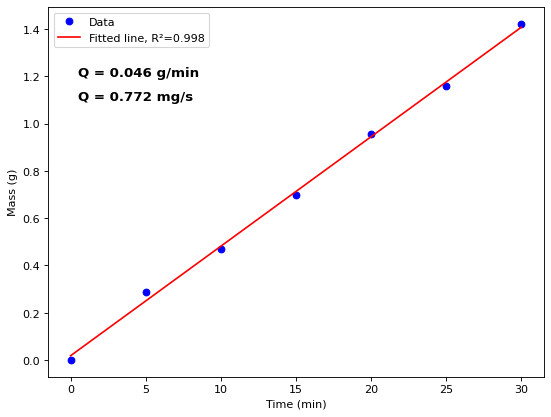

In [8]:
# Mass of empty container
empty = np.array([2.377, 2.382, 2.397, 2.375, 2.374, 2.380])
# Mass of container with water after 5 minutes between each measurement
w_water = np.array([2.665, 2.564,2.625,2.632,2.576,2.644]) 
data = w_water - empty
mass = [0] + list(itertools.accumulate(data))
minutes = np.array([0, 1, 2, 3, 4, 5,6])*5

#fit
def func(x, a, b):
    return a * x + b

popt, pcov = curve_fit(func, minutes, mass)

#r_squared
r_squared = 1 - np.sum((mass - func(minutes, *popt))**2) / np.sum((mass - np.mean(mass))**2)


fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.subplots(1,1)
ax.plot(minutes,mass, 'o', color='blue', label='Data')
ax.plot(minutes, func(minutes, *popt), 'r-', label='Fitted line, R²={:.3f}'.format(r_squared))
ax.text(0.5, 1.2, 'Q = {:.3f} g/min'.format(popt[0]), fontsize=12, color='k', fontweight='bold')
ax.text(0.5, 1.1, 'Q = {:.3f} mg/s'.format(popt[0]*1000/60), fontsize=12, color='k', fontweight='bold')
ax.set_ylabel('Mass (g)')
ax.set_xlabel('Time (min)')
ax.legend()

